#Step 1: Import the necessary libraries:

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Step 2: Load the dataset from a CSV file:

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/pip-datasets/diabetes.csv')
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

#Step 3: Data cleaning and processing
# Perform any necessary data preprocessing steps, such as handling missing values or scaling features
# (For this example, let's assume the data is already preprocessed)
# Then separate the features (X) and target variable (y)

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# # Perform one-hot encoding on categorical columns
# categorical_cols = ['Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred']
# encoder = OneHotEncoder(sparse=False)
# # X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
# # X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# # # Concatenate the encoded categorical columns with the remaining numerical columns
# # X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)
# X_encoded = encoder.fit_transform(X[categorical_cols])
# encoded_cols = encoder.get_feature_names_out(categorical_cols)
# X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# # Concatenate the encoded categorical columns with the remaining numerical columns
# X_final = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)
print(X,y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


#Step 4: Exploratory Data Analysis (EDA) and Visualization

Data Summary:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glu

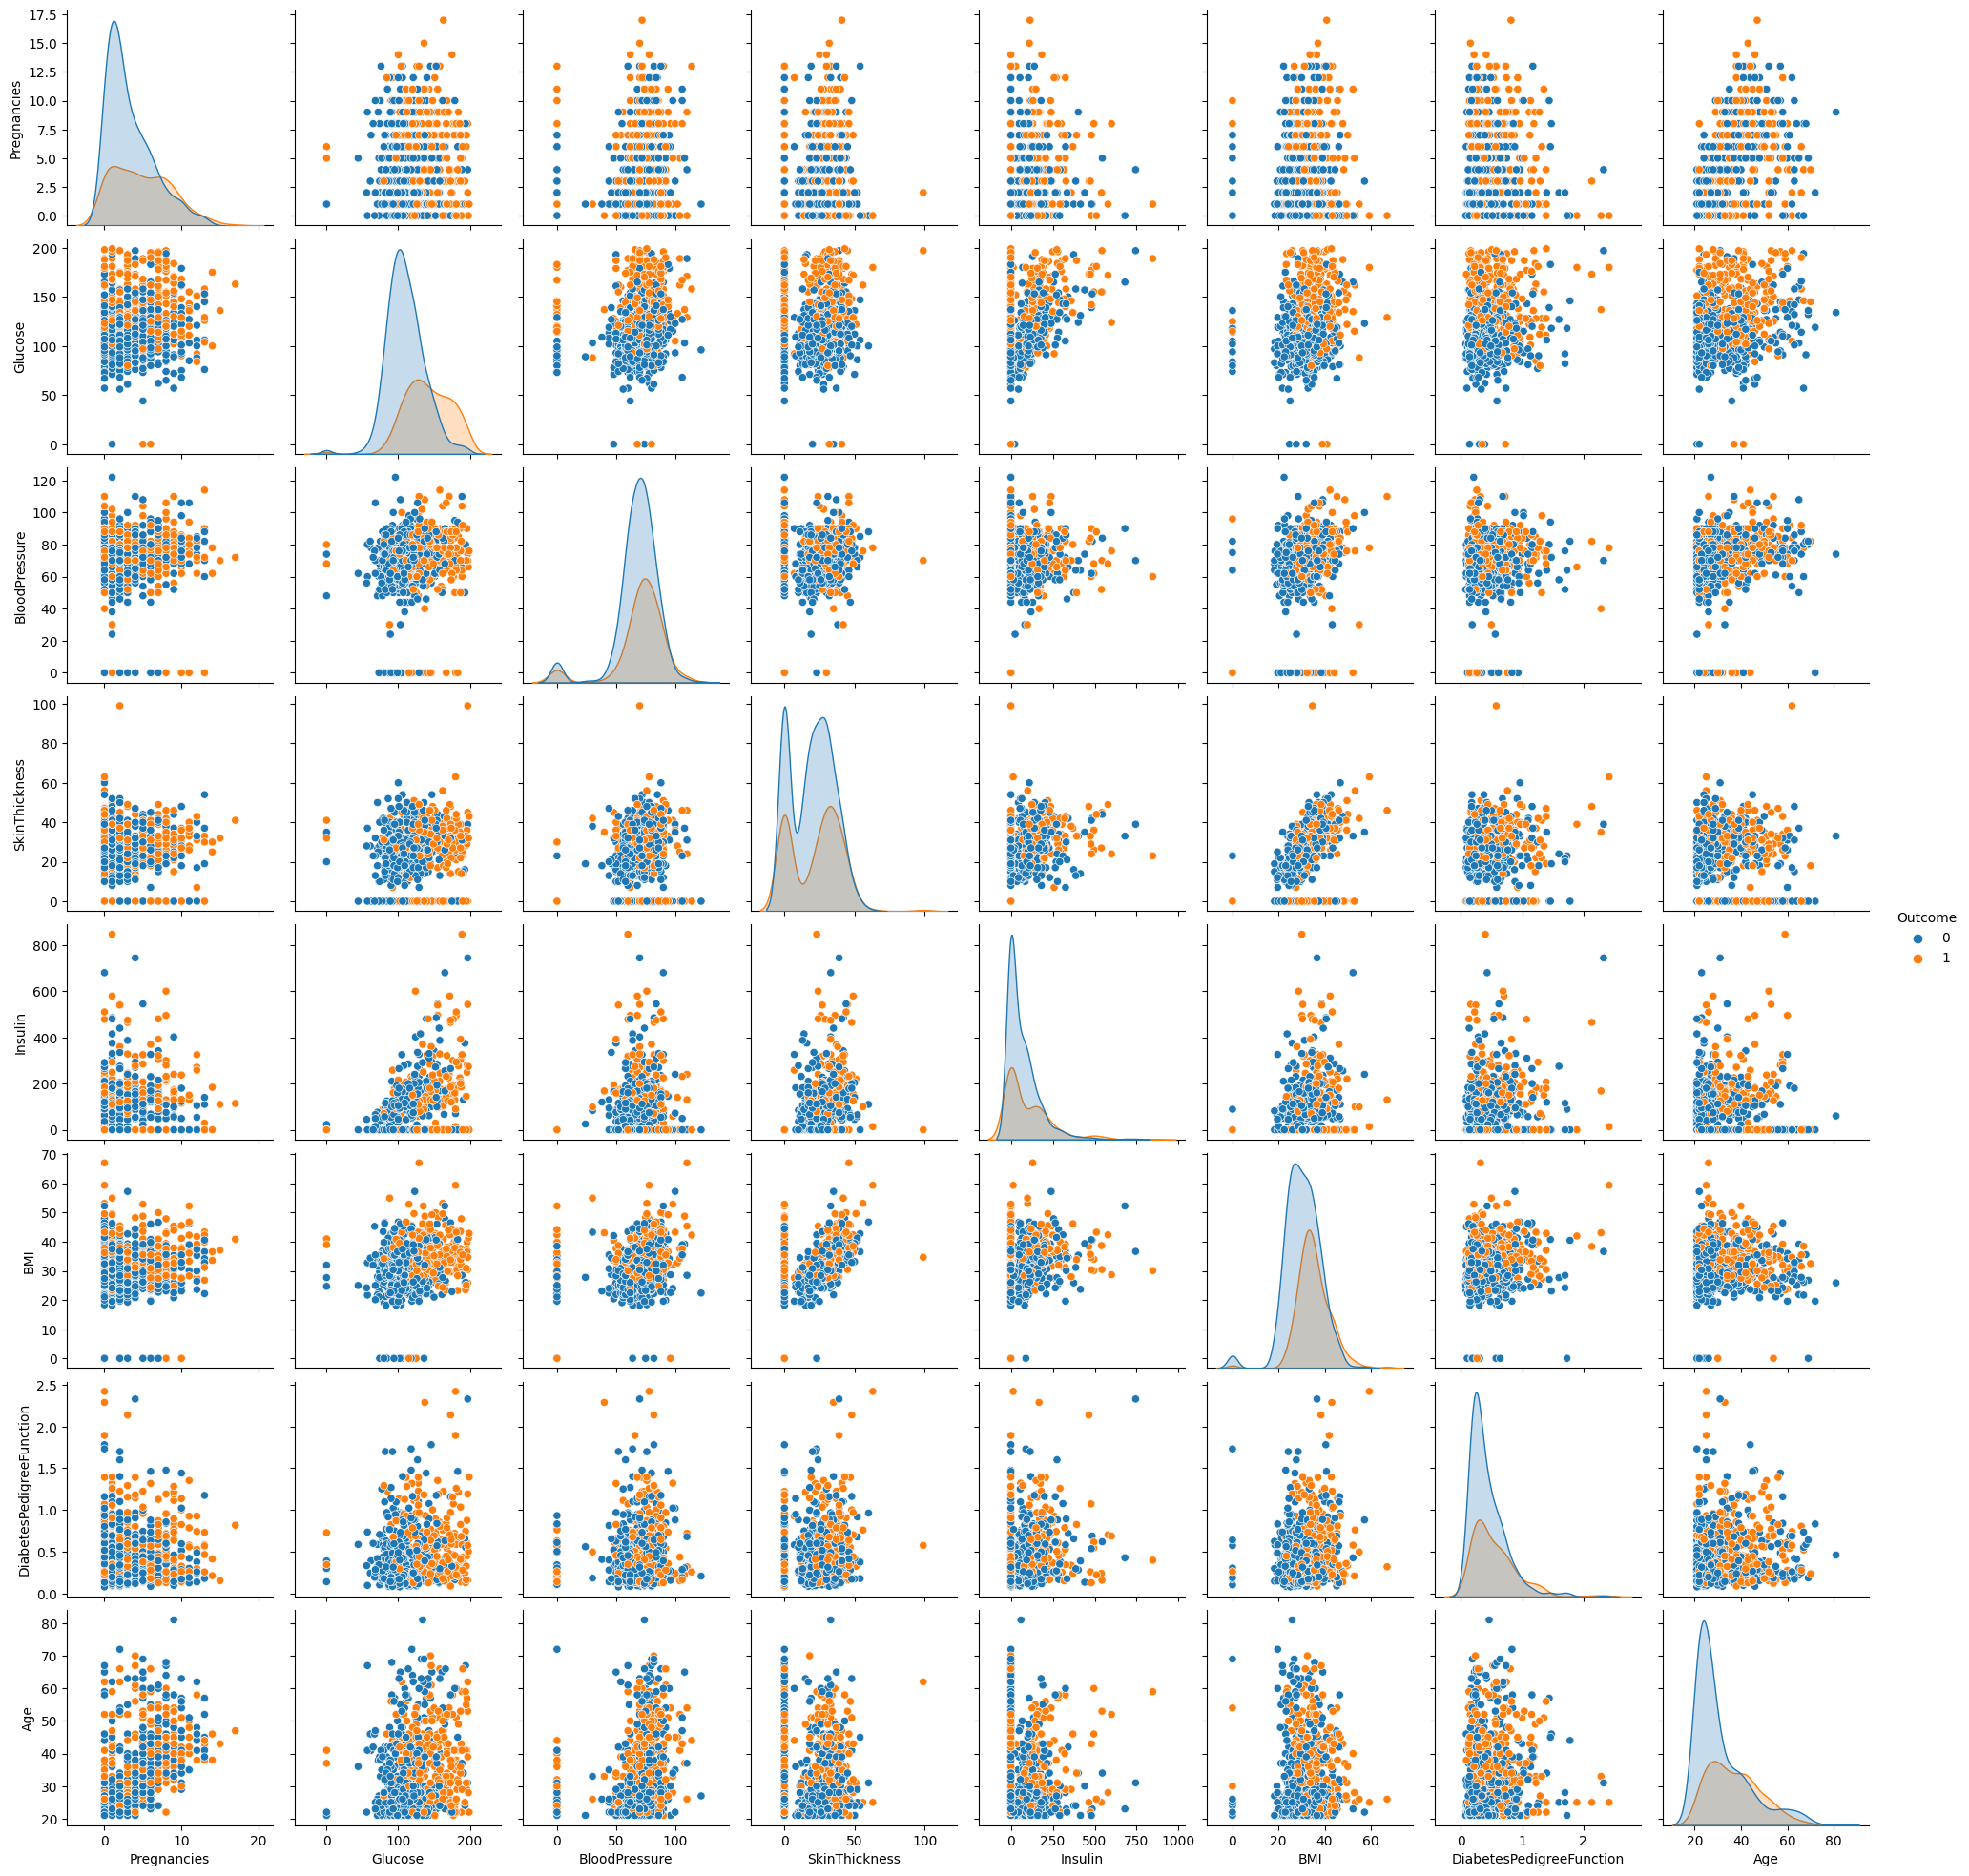

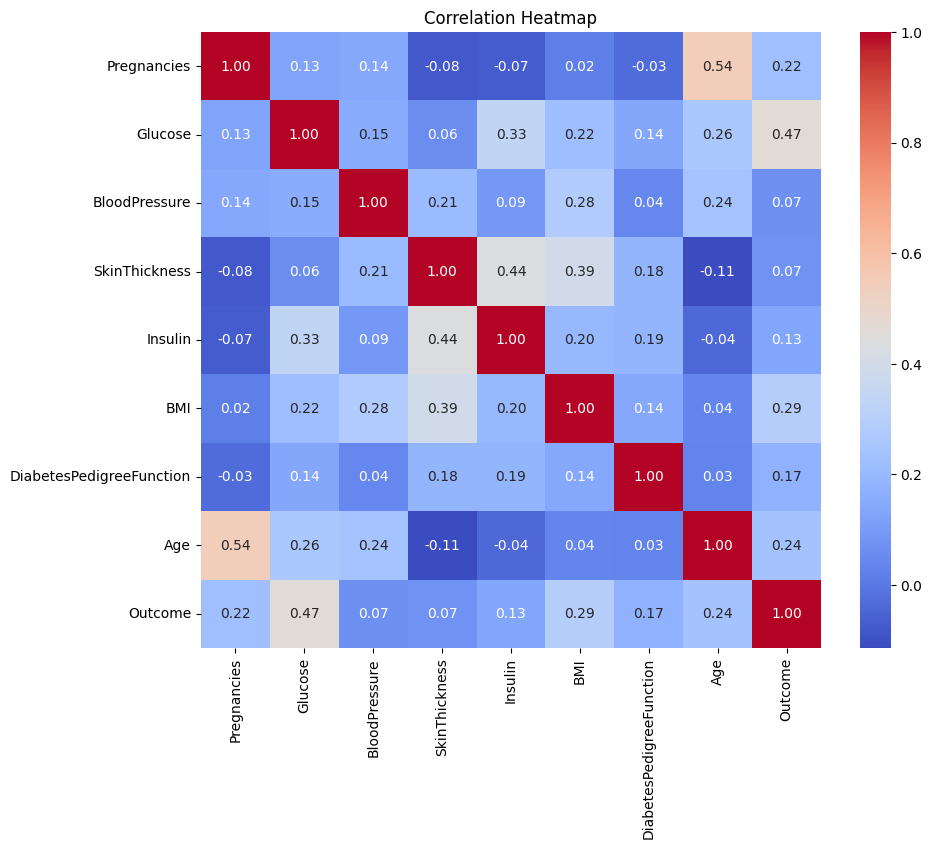

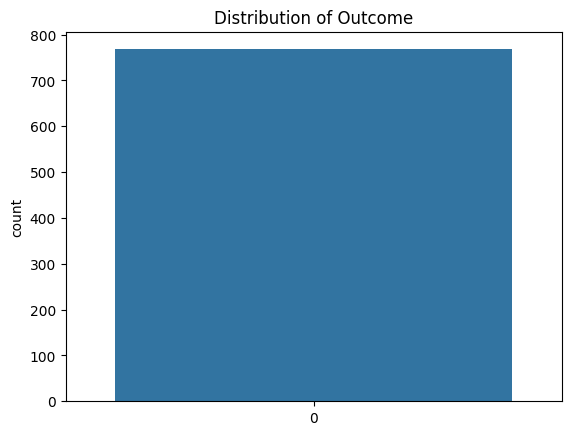

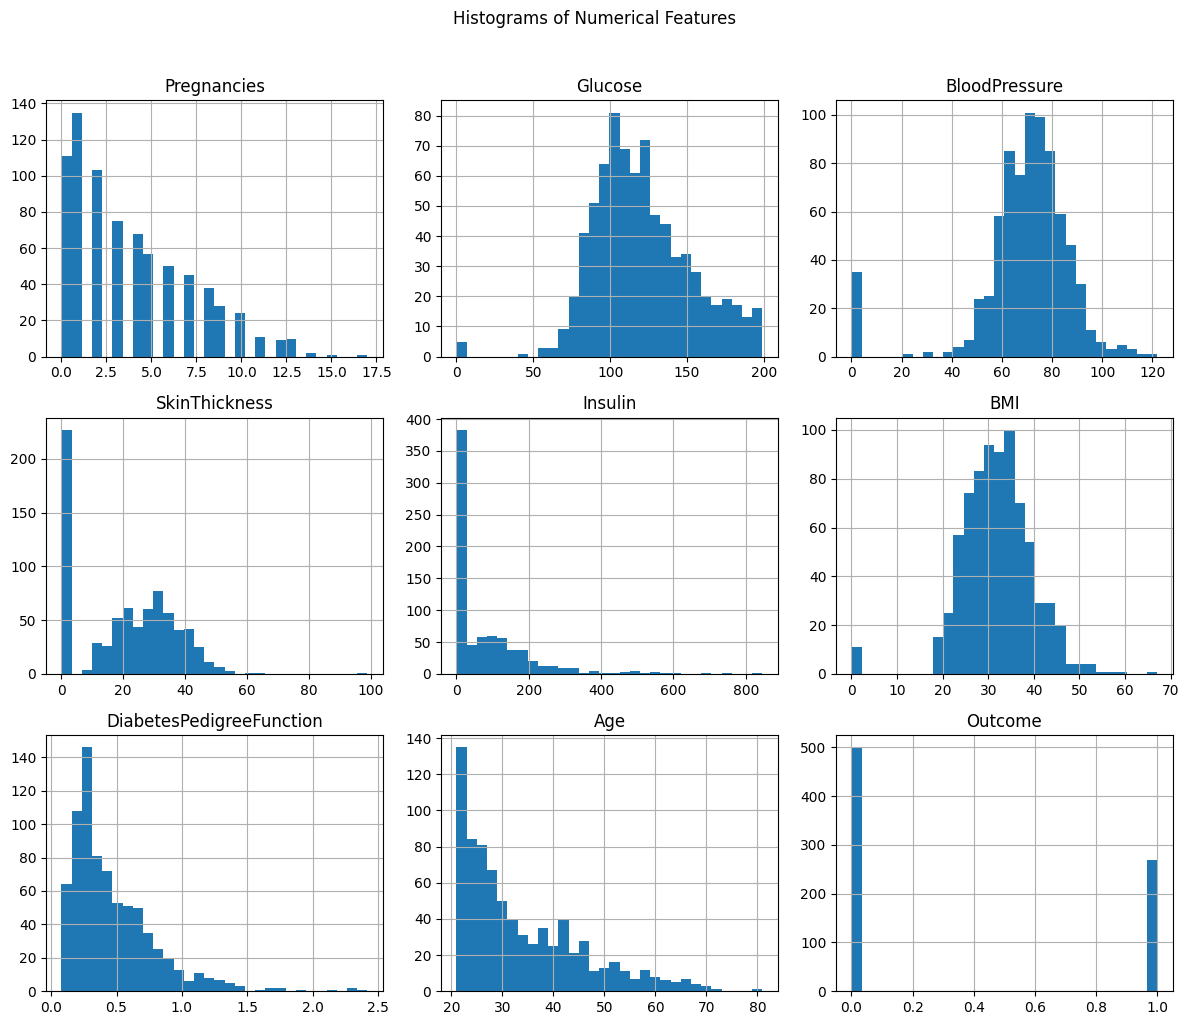

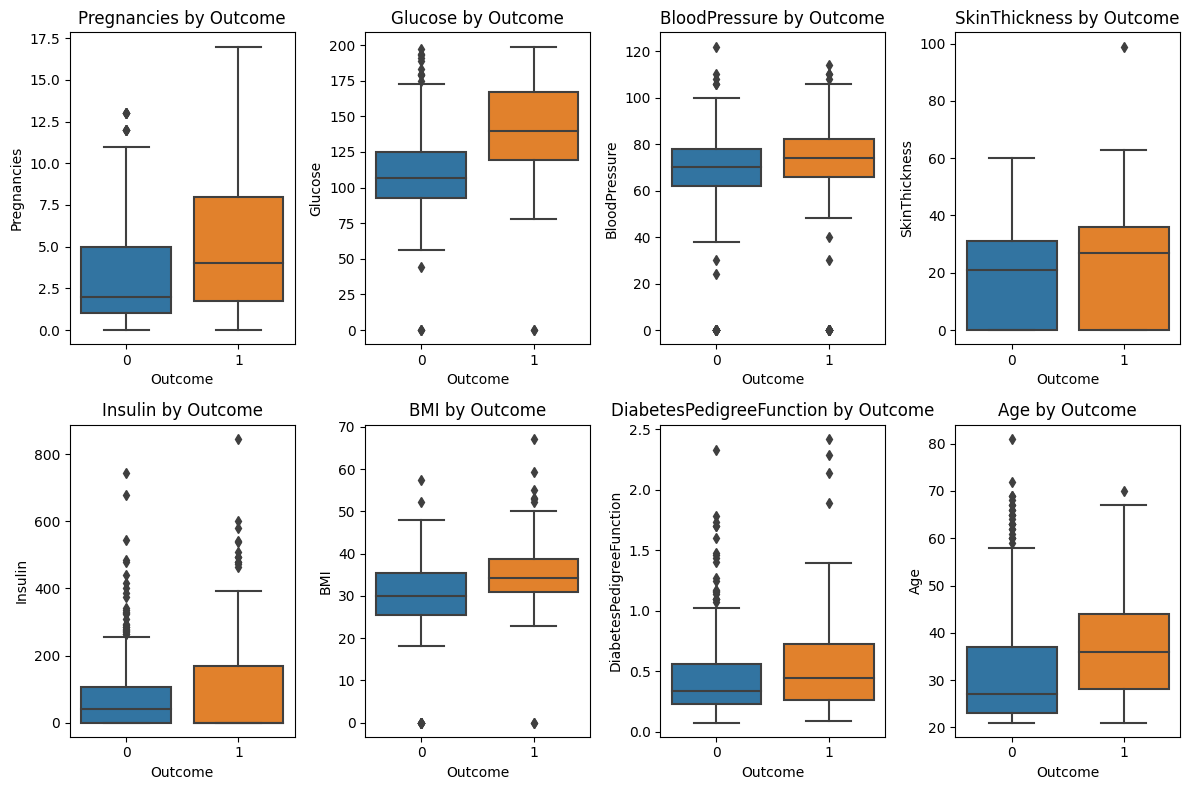

In [ ]:
# Step : Data Summary
print("Data Summary:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nData Statistics:")
print(data.describe())

# Step : Data Visualization and EDA
# Pairplot for visualizing relationships between features
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable 'Outcome'
sns.countplot(data['Outcome'])
plt.title('Distribution of Outcome')
plt.show()

# Histograms of numerical features
data.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

# Boxplots for numerical features by Outcome
numerical_features = data.drop('Outcome', axis=1).columns
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.title(f'{feature} by Outcome')
plt.tight_layout()
plt.show()


#Step 5: Train and test data split

In [ ]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Model Training

In [ ]:
# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

#Step 6: Feature Importance Calculation

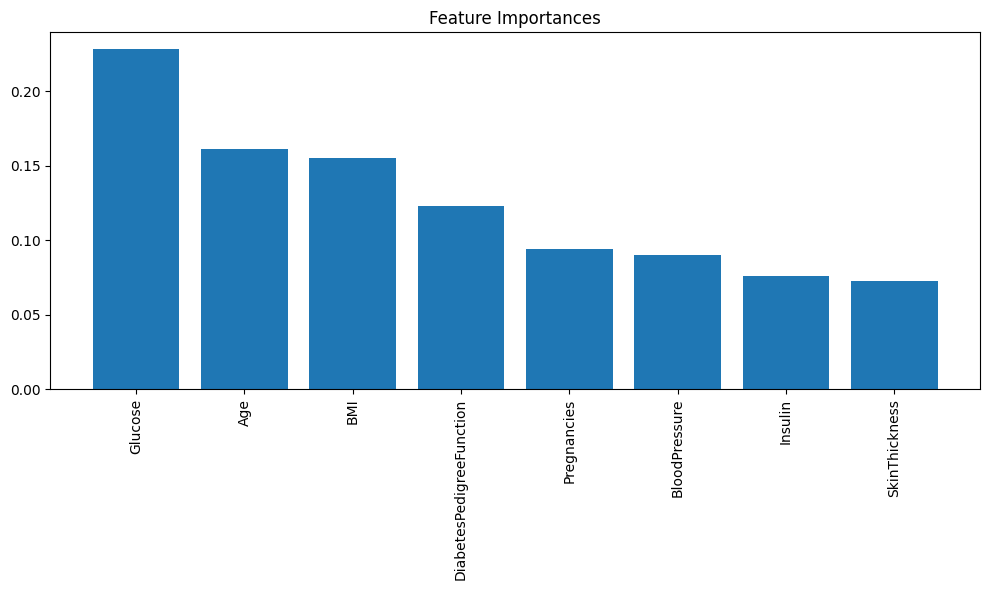

In [ ]:
# Calculate feature importance
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

#  Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


#Step 7: Model training with cross validation

Cross-Validation Scores: [0.77922078 0.72727273 0.77922078 0.81699346 0.75816993]
Mean Cross-Validation Score: 0.7721755368814192


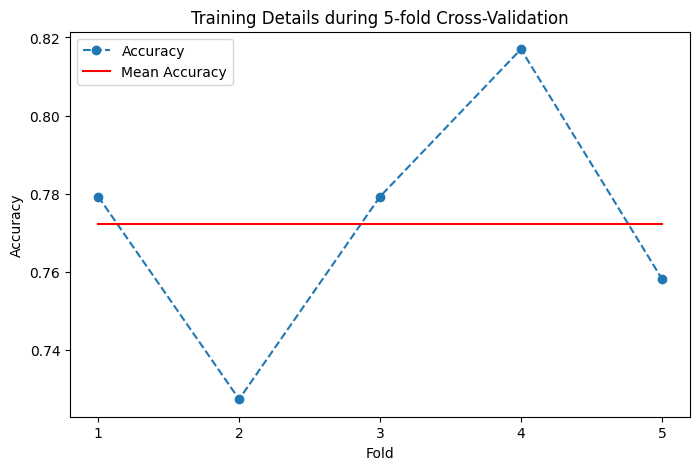

In [ ]:
# Model training with 5-fold cross-validation
rf_classifier = RandomForestClassifier()
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')
cv_predictions = cross_val_predict(rf_classifier, X, y, cv=5)

# Calculate mean cross-validation score
mean_cv_score = np.mean(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

# Plot training details
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label='Accuracy')
plt.plot(range(1, 6), [mean_cv_score] * 5, color='r', linestyle='-', label='Mean Accuracy')
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training Details during 5-fold Cross-Validation')
plt.legend()
plt.show()

#Step 8: Model testing and evaluation

Accuracy: 0.7077922077922078
Precision: 0.5862068965517241
Recall: 0.6181818181818182
F1-score: 0.6017699115044246
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        99
           1       0.59      0.62      0.60        55

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



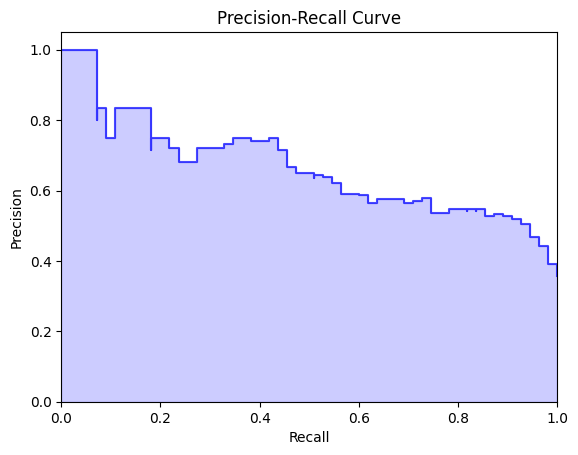

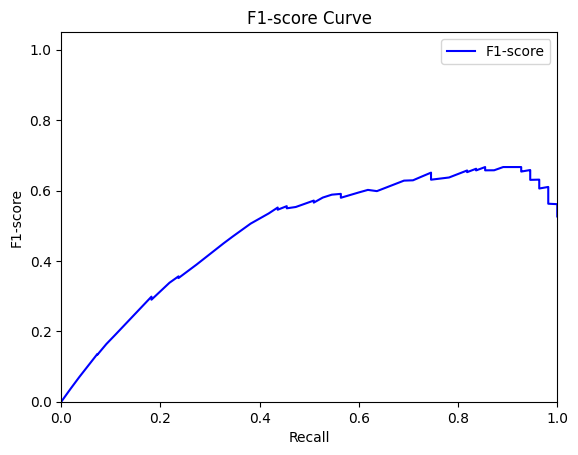

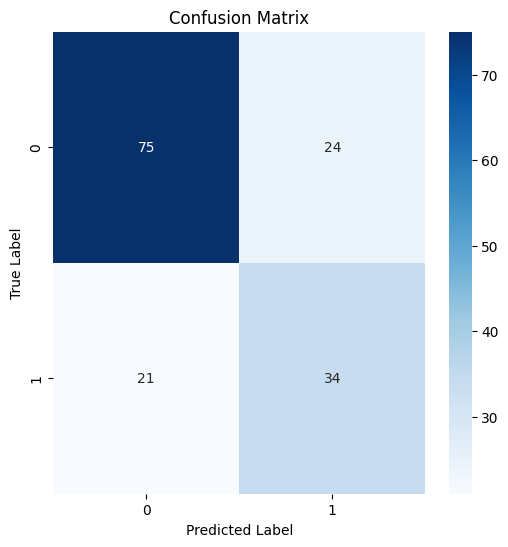

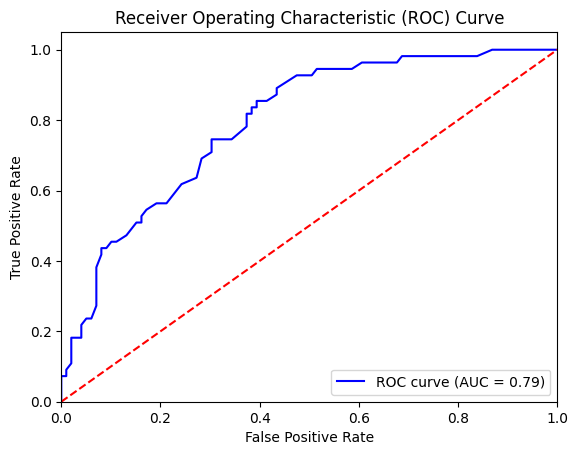

In [ ]:
# Model testing and evaluation
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)



# Plot Precision-Recall curve
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Plot F1-score curve
f1_values = 2 * (precision * recall) / (precision + recall)
plt.plot(recall, f1_values, color='b', label='F1-score')
plt.xlabel('Recall')
plt.ylabel('F1-score')
plt.title('F1-score Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend()
plt.show()


# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Calculate ROC curve and AUC
y_pred_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Train test graphs

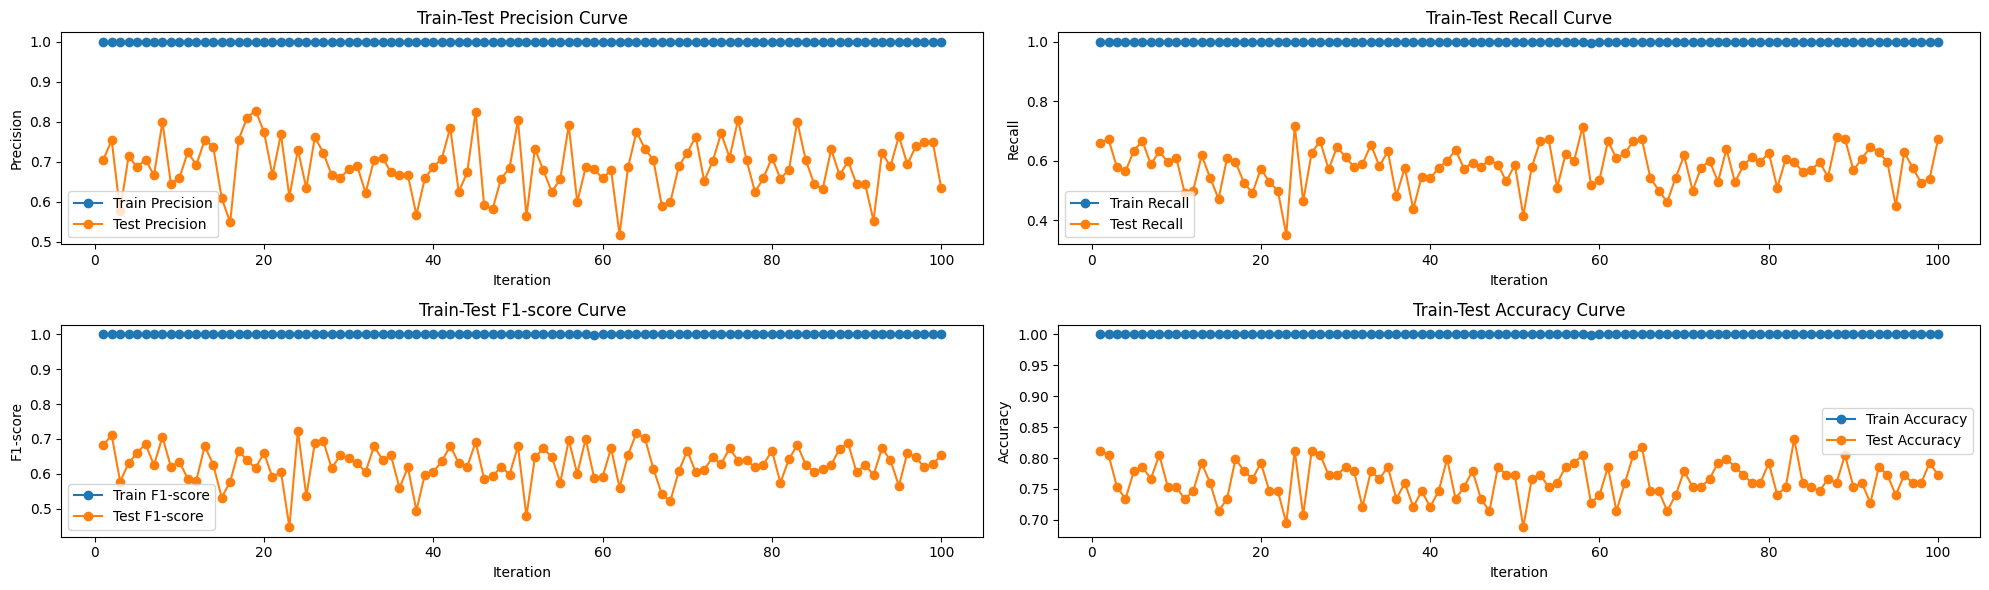

In [ ]:
data = data

# Initialize lists to store train and test scores for each iteration
train_precision, test_precision = [], []
train_recall, test_recall = [], []
train_f1, test_f1 = [], []
train_accuracy, test_accuracy = [], []

# Number of iterations for train-test splits
num_iterations = 100

for i in range(num_iterations):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Step 3: Model training
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    # Step 4: Model evaluation on train and test sets
    y_train_pred = rf_classifier.predict(X_train)
    y_test_pred = rf_classifier.predict(X_test)

    # Calculate precision, recall, F1-score, and accuracy for train and test sets
    train_precision.append(precision_score(y_train, y_train_pred))
    test_precision.append(precision_score(y_test, y_test_pred))

    train_recall.append(recall_score(y_train, y_train_pred))
    test_recall.append(recall_score(y_test, y_test_pred))

    train_f1.append(f1_score(y_train, y_train_pred))
    test_f1.append(f1_score(y_test, y_test_pred))

    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))

# Step 5: Plot train-test curves
iterations = np.arange(1, num_iterations + 1)

plt.figure(figsize=(20, 6))

# Precision curve
plt.subplot(2, 2, 1)
plt.plot(iterations, train_precision, marker='o', label='Train Precision')
plt.plot(iterations, test_precision, marker='o', label='Test Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.title('Train-Test Precision Curve')
plt.legend()

# Recall curve
plt.subplot(2, 2, 2)
plt.plot(iterations, train_recall, marker='o', label='Train Recall')
plt.plot(iterations, test_recall, marker='o', label='Test Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Train-Test Recall Curve')
plt.legend()

# F1-score curve
plt.subplot(2, 2, 3)
plt.plot(iterations, train_f1, marker='o', label='Train F1-score')
plt.plot(iterations, test_f1, marker='o', label='Test F1-score')
plt.xlabel('Iteration')
plt.ylabel('F1-score')
plt.title('Train-Test F1-score Curve')
plt.legend()

# Accuracy curve
plt.subplot(2, 2, 4)
plt.plot(iterations, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracy, marker='o', label='Test Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Train-Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# User Input for Prediction
print("Please enter the values for the following features:")
user_input = {}
for feature in X.columns:
    user_input[feature] = float(input(f"{feature}: "))

# Convert user input into DataFrame and predict
user_data = pd.DataFrame(user_input, index=[0])
prediction = rf_classifier.predict(user_data)

if prediction[0] == 1:
    print("The model predicts that the person is likely to have diabetes.")
else:
    print("The model predicts that the person is unlikely to have diabetes.")

Please enter the values for the following features:
Pregnancies: 123
Glucose: 7
BloodPressure: 120
SkinThickness: 1
Insulin: 65
BMI: 67
DiabetesPedigreeFunction: 4
Age: 35
The model predicts that the person is unlikely to have diabetes.
